In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import  SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score,precision_score,f1_score,confusion_matrix,classification_report

In [62]:
from sklearn.pipeline import Pipeline
import joblib
from sklearn.impute import SimpleImputer

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df_csv = pd.read_csv("default of credit card clients.csv")
df = pd.DataFrame(df_csv)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [5]:
df.shape

(30000, 25)

In [6]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df = df.rename(columns={
    'PAY_0': 'sept_paystat',
    'PAY_2': 'aug_paystat',
    'PAY_3': 'july_paystat',
    'PAY_4': 'june_paystat',
    'PAY_5': 'may_paystat',
    'PAY_6': 'april_paystat',
    'BILL_AMT1': 'sept_bill',
    'BILL_AMT2': 'aug_bill',
    'BILL_AMT3': 'july_bill',
    'BILL_AMT4': 'june_bill',
    'BILL_AMT5': 'may_bill',
    'BILL_AMT6': 'april_bill',
    'PAY_AMT1': 'sept_payment',
    'PAY_AMT2': 'aug_payment',
    'PAY_AMT3': 'july_payment',
    'PAY_AMT4': 'june_payment',
    'PAY_AMT5': 'may_payment',
    'PAY_AMT6': 'april_payment'
})

In [9]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE',
       'sept_paystat', 'aug_paystat', 'july_paystat', 'june_paystat',
       'may_paystat', 'april_paystat', 'sept_bill', 'aug_bill', 'july_bill',
       'june_bill', 'may_bill', 'april_bill', 'sept_payment', 'aug_payment',
       'july_payment', 'june_payment', 'may_payment', 'april_payment',
       'default payment next month'],
      dtype='object')

In [10]:
numereical_columns = df.select_dtypes(include= ['int64','float64'])

In [11]:
numereical_columns.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,sept_paystat,aug_paystat,july_paystat,june_paystat,...,june_bill,may_bill,april_bill,sept_payment,aug_payment,july_payment,june_payment,may_payment,april_payment,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


<Axes: >

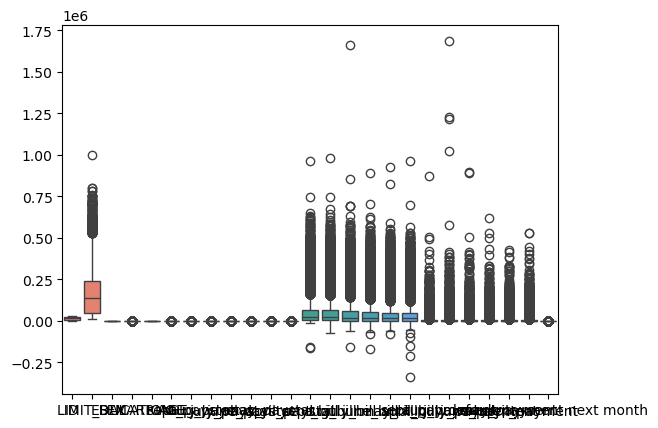

In [12]:
sns.boxplot(numereical_columns)

In [13]:
def handling_outliers(df):
    for col in df.select_dtypes(include = 'number').columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        Lower_bound = Q1 - (1.5 * IQR)
        Upper_bound = Q3 + (1.5 * IQR)

        #removing 
        df[col] = df[col].apply(lambda x: Lower_bound if x < Lower_bound else Upper_bound if x > Upper_bound else x)
    return df

In [14]:
numereical_columns = numereical_columns.drop(columns='default payment next month')

In [15]:
df1 = handling_outliers(numereical_columns)
df1['default payment next month'] = df['default payment next month']

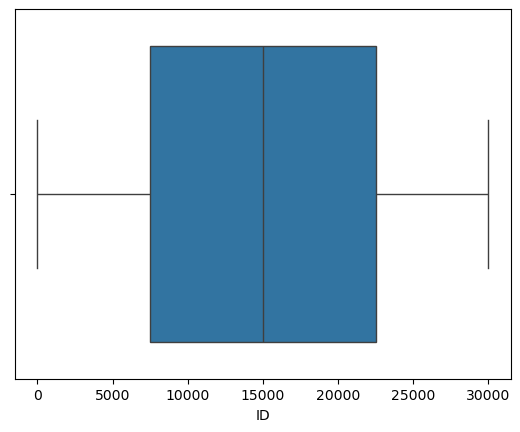

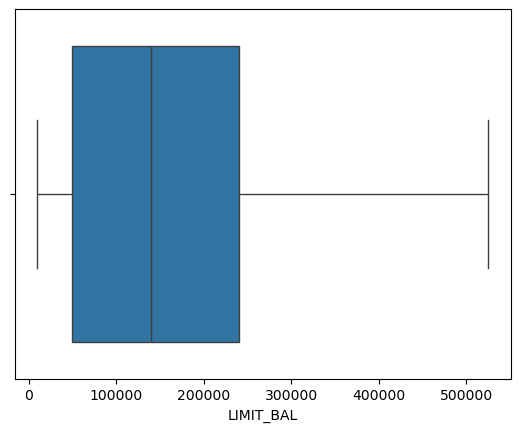

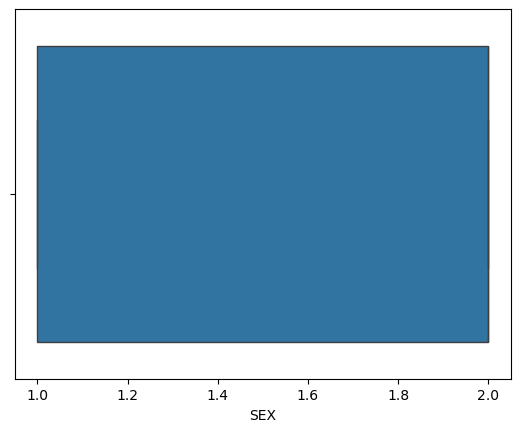

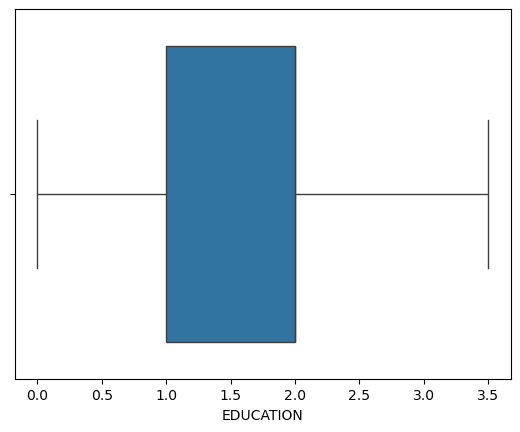

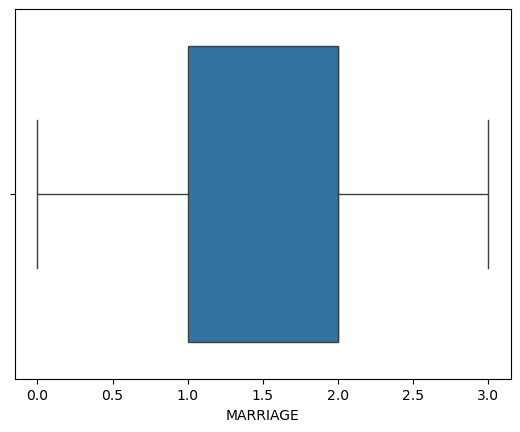

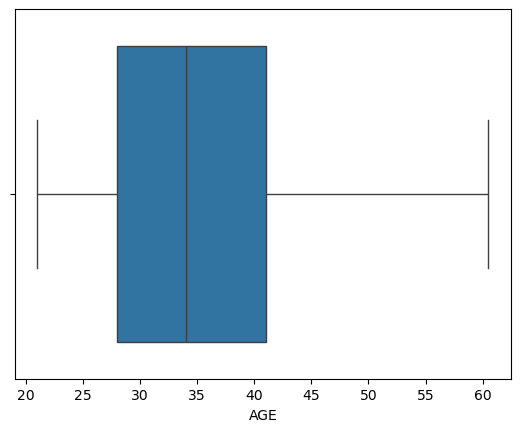

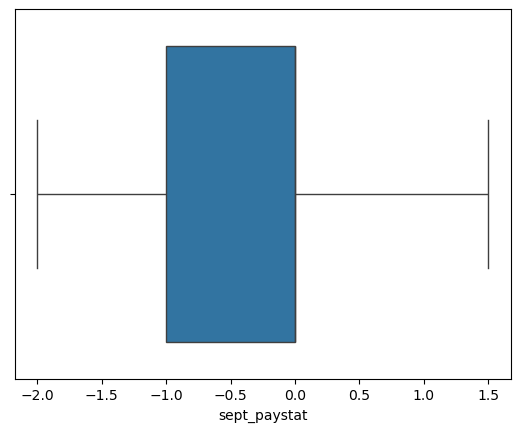

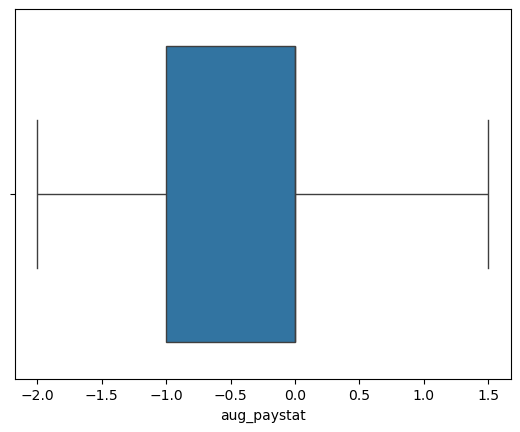

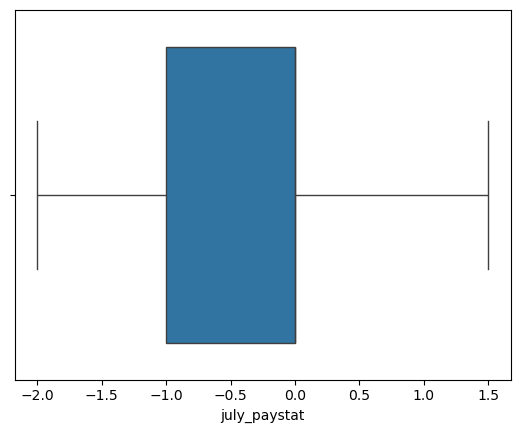

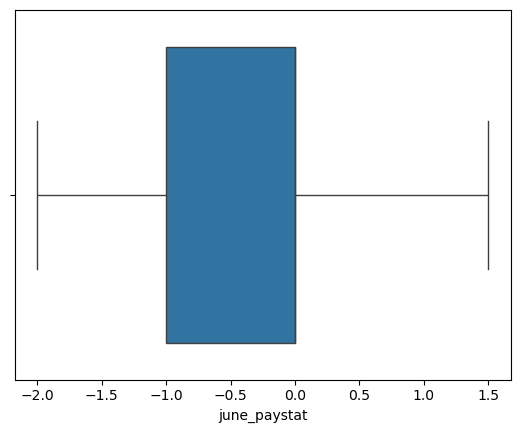

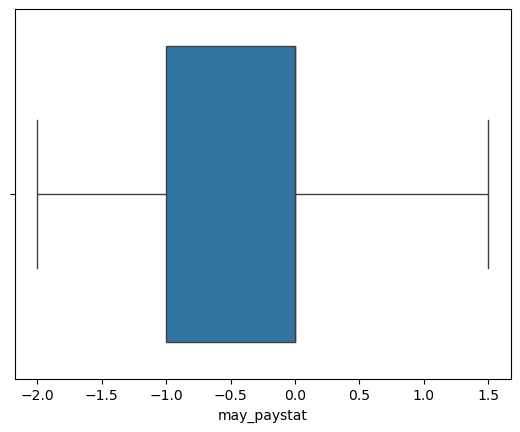

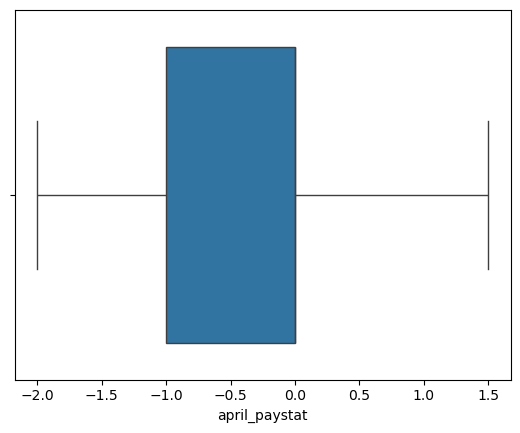

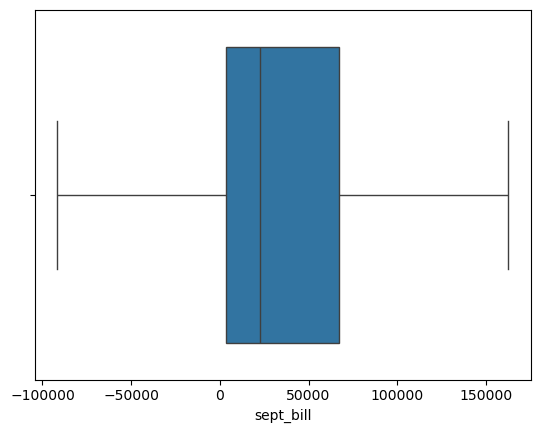

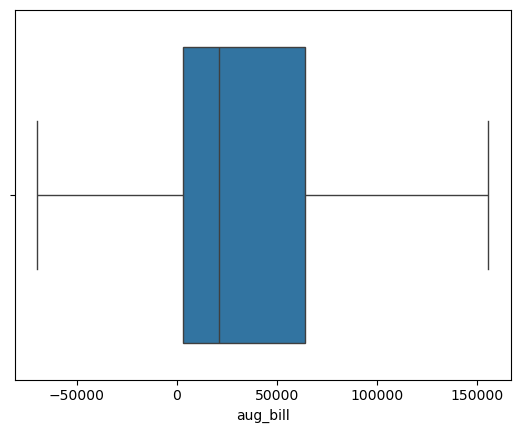

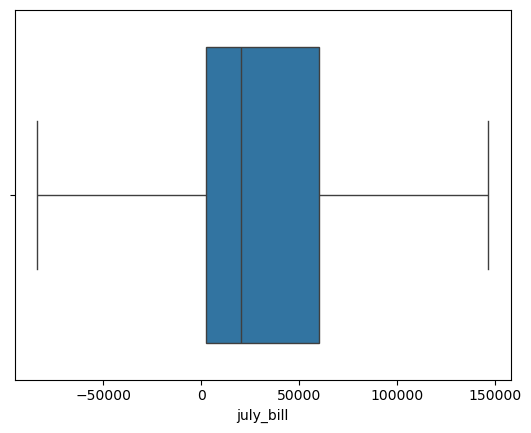

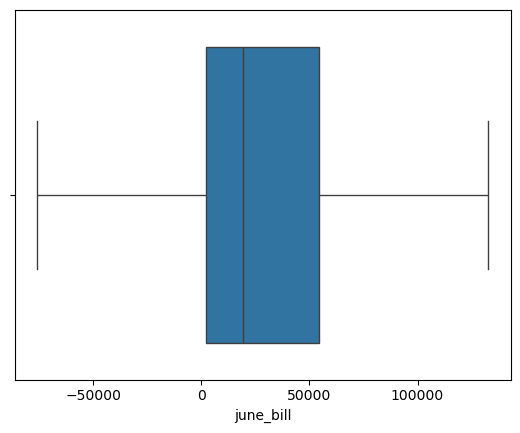

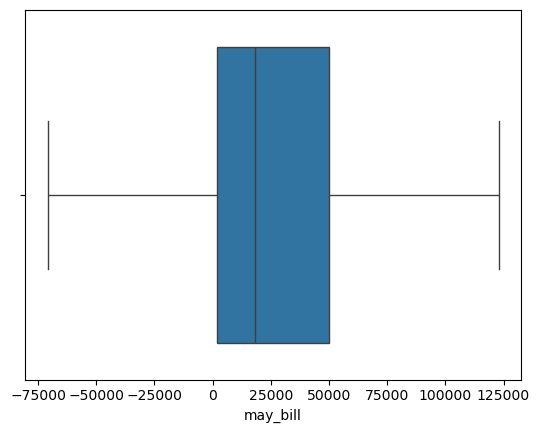

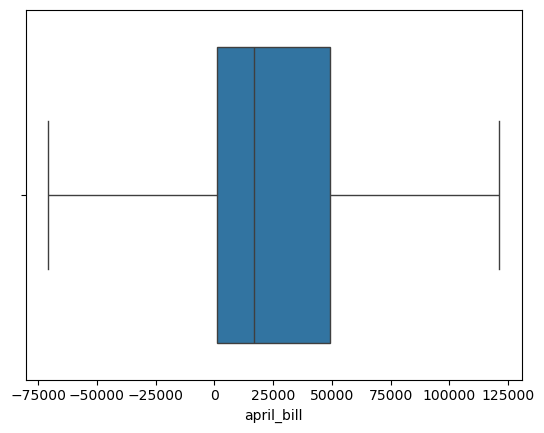

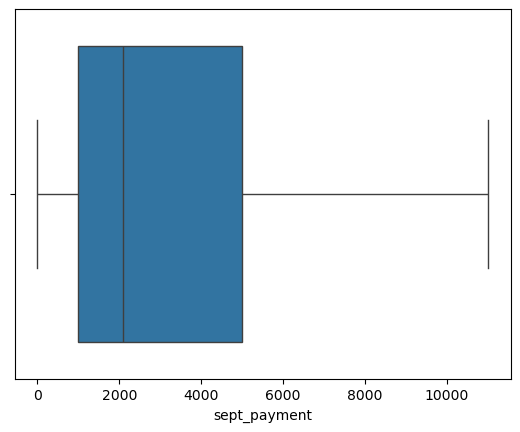

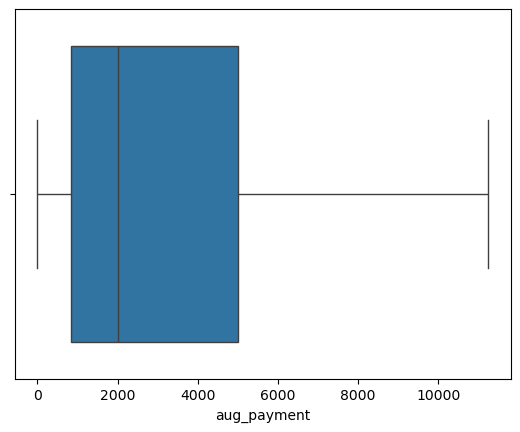

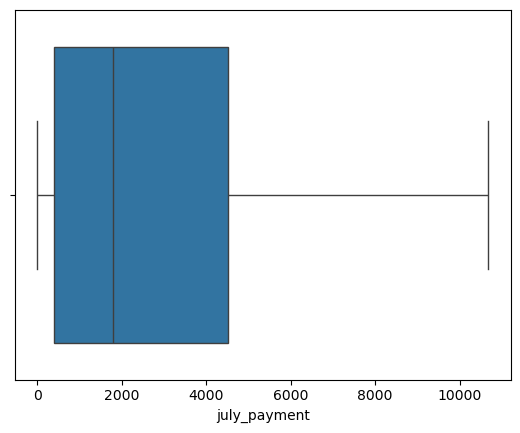

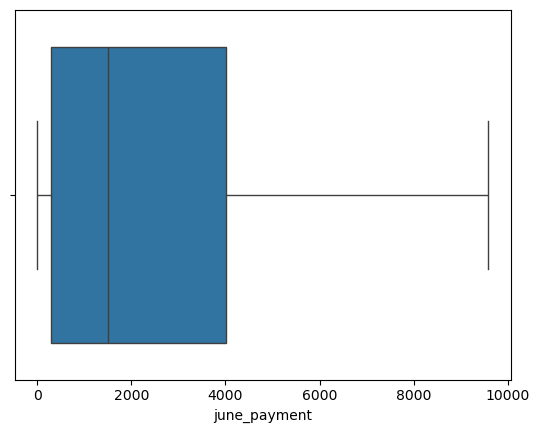

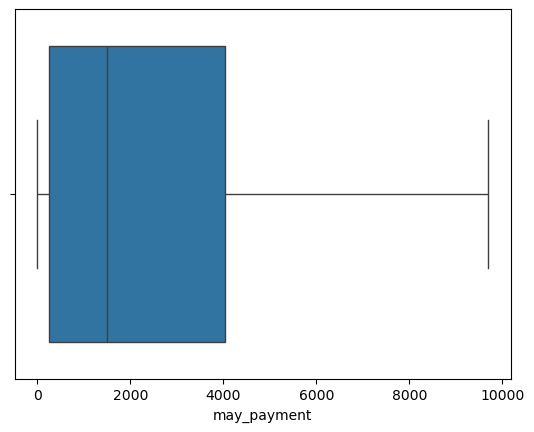

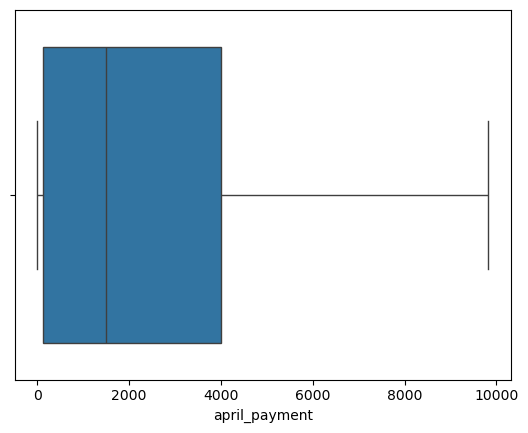

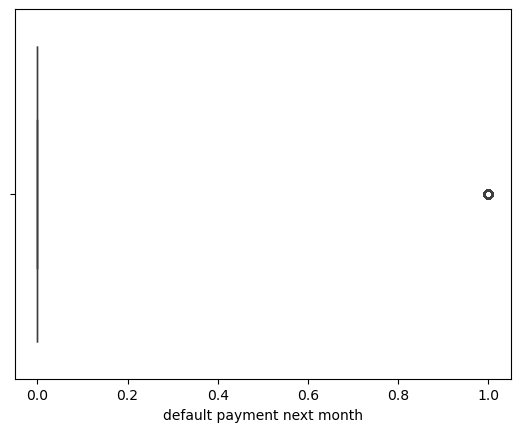

In [16]:
for column in df1.columns:
    sns.boxplot(data = df1,x = column)
    plt.show()

In [17]:
target_value = df['default payment next month'].value_counts()
target_value

default payment next month
0    23364
1     6636
Name: count, dtype: int64

In [18]:
from imblearn.over_sampling import SMOTE

In [19]:
smote = SMOTE(random_state= 42)

In [20]:
X = df.drop(columns=['default payment next month'])
y = df['default payment next month']

In [21]:
selecter = SelectKBest(score_func= f_classif, k=14)
X_new = selecter.fit_transform(X,y)

In [22]:
selected_features = X.columns[selecter.get_support()]
feature_score = pd.DataFrame({'features':X.columns,'score':selecter.scores_}).sort_values(by = 'score',ascending= False)

In [23]:
feature_score

,features,score
6,sept_paystat,3537.714970
7,aug_paystat,2239.169136
8,july_paystat,1757.466444
9,june_paystat,1476.845967
10,may_paystat,1304.591176
11,april_paystat,1085.402485
1,LIMIT_BAL,724.068539
18,sept_payment,160.403810
19,aug_payment,103.291524
21,june_payment,97.188000


In [24]:
print(selected_features)

Index(['LIMIT_BAL', 'SEX', 'sept_paystat', 'aug_paystat', 'july_paystat',
       'june_paystat', 'may_paystat', 'april_paystat', 'sept_payment',
       'aug_payment', 'july_payment', 'june_payment', 'may_payment',
       'april_payment'],
      dtype='object')


In [25]:
X_selected = X[selected_features] 

In [26]:
X_selected.columns

Index(['LIMIT_BAL', 'SEX', 'sept_paystat', 'aug_paystat', 'july_paystat',
       'june_paystat', 'may_paystat', 'april_paystat', 'sept_payment',
       'aug_payment', 'july_payment', 'june_payment', 'may_payment',
       'april_payment'],
      dtype='object')

In [27]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state= 42)

In [28]:
X_train_resambled,y_train_resambled = smote.fit_resample(X_train,y_train)

In [29]:
print(X_train_resambled.shape)
print(y_train_resambled.shape)

(37354, 24)
(37354,)


In [30]:
target_value_resambled = y_train_resambled.value_counts()
target_value_resambled

default payment next month
0    18677
1    18677
Name: count, dtype: int64

In [31]:
y_train.shape

(24000,)

In [32]:
y_test.shape

(6000,)

In [33]:
Ss = StandardScaler()

In [34]:
X_test_scaled = Ss.fit_transform(X_test)
X_train_scaled = Ss.fit_transform(X_train)

In [39]:
X_train_scaled

array([[ 0.7768437 , -0.67235902,  0.80815856, ..., -0.22465419,
        -0.21600791, -0.24524018],
       [-1.70028095, -1.05776818, -1.23738094, ..., -0.24078483,
        -0.30852284, -0.29553162],
       [ 0.9137065 ,  0.0984593 ,  0.80815856, ...,  0.12267581,
         0.35348711, -0.28510675],
       ...,
       [-1.63012149, -0.90360452, -1.23738094, ..., -0.29935805,
        -0.30852284, -0.29553162],
       [ 0.09045598, -0.74944086,  0.80815856, ..., -0.22575819,
        -0.30852284, -0.22679617],
       [ 0.99584723, -0.05570437,  0.80815856, ..., -0.19815824,
         0.60062042, -0.20961231]])

In [40]:
y_train

21753    0
251      0
22941    0
618      0
17090    0
        ..
29802    0
5390     1
860      0
15795    1
23654    1
Name: default payment next month, Length: 24000, dtype: int64

In [41]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree Classifier': DecisionTreeClassifier(),
    'Random Forest Classifier' : RandomForestClassifier(),
    'SVM':SVC(),
    'Gradient Boosting Classifier': GradientBoostingClassifier()
    
}

In [42]:
result = {}

for name,model in models.items():
    model.fit(X_train_scaled,y_train)
    y_pred = model.predict(X_test_scaled)

    acc = accuracy_score(y_test,y_pred)
    con = confusion_matrix(y_test,y_pred)
    classif = classification_report(y_test,y_pred)
    result[name] = {'accuracy':acc,'confusion matrix':con,'classification report':classif}

In [44]:
for name,metrics in result.items():
    print(f'{name} Results:')
    print(f'accuracy: {metrics['accuracy']:.4f}')
    print(f'confusion matrix: {metrics['confusion matrix']}')
    print(f'classification report : {metrics['classification report']}')

Logistic Regression Results:
accuracy: 0.8100
confusion matrix: [[4540  147]
 [ 993  320]]
classification report :               precision    recall  f1-score   support

           0       0.82      0.97      0.89      4687
           1       0.69      0.24      0.36      1313

    accuracy                           0.81      6000
   macro avg       0.75      0.61      0.62      6000
weighted avg       0.79      0.81      0.77      6000

Decision Tree Classifier Results:
accuracy: 0.7080
confusion matrix: [[3688  999]
 [ 753  560]]
classification report :               precision    recall  f1-score   support

           0       0.83      0.79      0.81      4687
           1       0.36      0.43      0.39      1313

    accuracy                           0.71      6000
   macro avg       0.59      0.61      0.60      6000
weighted avg       0.73      0.71      0.72      6000

Random Forest Classifier Results:
accuracy: 0.8170
confusion matrix: [[4436  251]
 [ 847  466]]
classification 

In [51]:
best_model = max(result)

In [52]:
best_model

'SVM'

In [53]:
result_df = pd.DataFrame(result).T
result_df

,accuracy,confusion matrix,classification report
Logistic Regression,0.81,"[[4540, 147], [993, 320]]",precision recall f1-score ...
Decision Tree Classifier,0.708,"[[3688, 999], [753, 560]]",precision recall f1-score ...
Random Forest Classifier,0.817,"[[4436, 251], [847, 466]]",precision recall f1-score ...
SVM,0.8185,"[[4481, 206], [883, 430]]",precision recall f1-score ...
Gradient Boosting Classifier,0.819,"[[4440, 247], [839, 474]]",precision recall f1-score ...


In [54]:
best_model = result_df['accuracy'].idxmax()
model_name = result_df.loc[best_model]

In [59]:
print(f'The best model is {best_model}')
print("Metrics")
print(model_name)

The best model is Gradient Boosting Classifier
Metrics
accuracy                                                             0.819
confusion matrix                                 [[4440, 247], [839, 474]]
classification report                  precision    recall  f1-score   ...
Name: Gradient Boosting Classifier, dtype: object


In [63]:
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Handle missing values
    ('scaler', StandardScaler()),                # Scale the features
    ('model',GradientBoostingClassifier())
])

In [64]:
pipeline.fit(X_train_scaled,y_train)

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('model', GradientBoostingClassifier())])

In [65]:
y_pred = pipeline.predict(X_test_scaled)

In [66]:
joblib.dump(pipeline,'Gc.joblib')

['Gc.joblib']

In [67]:
pipeline_loaded = joblib.load('Gc.joblib')

In [ ]:
yess